Hello, my name is Ivan Alexeev and I am going to review your project.


There may be some shortcomings in the work that I will ask you to eliminate, you fix them and I check your decisions. You can find my comments in <font color='green'>green</font>, <font color='orange'>orange</font> or <font color='red'>red</font> boxes like this:


<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: if everything is done successfully
</div>


<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
Remark: if I can give some recommendations or additional information
</div>


<div class="alert alert-danger" style="box-shadow: 4px 4px 4px">
Need fixing: if the block requires some corrections. Work can't be accepted with the red comments
</div>


Thank you for taking time to complete this project, I appreciate the amount of work you've done! 


Please, don't delete my comments) 


# General feedback
First of all, your project is accepted! You've done an amazing job! I want to highlight separately how excellent your graphs are. Everything is perfect in them. Keep up the good work. Graphs are one of the most important parts of the report, because it is the most visual. I also want to note the abundance of functions and the excellent design of the notebook!


Good luck in future learning! 

We will carry a study for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.
In front of us is data going back to 2016. Let’s imagine that it’s December 2016 and we’re planning a campaign for 2017.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Good introduction!
</div>

# Overview and studying the general information
<a class="anchor" id="Overviewandstudyingthegeneralinformation"></a>

First, Let's install sidetable, this tool will help us in our data preprocessing.
Second, Let's install squarify (Will help us with our graphs in the future)

In [1]:
pip install sidetable

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Import all the necessaries libraries

In [3]:
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
import sidetable
import platform
import math

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import all the necesaries files

In [4]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv ('/datasets/games.csv')

<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
Remark: There is a typo in this code cell.
</div>

In [5]:
#Print the first rows from the table using the head() method.
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
#Print the last rows from the table using the tail() method.
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [7]:
#Let's check for general information using the info() method.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
#Using describe method on the cuantative values of the data set
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [9]:
#Using describe method on the categorical values of the data set
data.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [10]:
#The most popular platforms and their percents, popular for appearing the most in the data set
data.stb.freq(['Platform'],style=True,cum_cols=False)

,Platform,count,percent
0,PS2,"2,161",12.93%
1,DS,"2,151",12.87%
2,PS3,"1,331",7.96%
3,Wii,"1,320",7.90%
4,X360,"1,262",7.55%
5,PSP,"1,209",7.23%
6,PS,"1,197",7.16%
7,PC,974,5.83%
8,XB,824,4.93%
9,GBA,822,4.92%


<a class="anchor" id="Overviewandstudyingthegeneralinformation"></a>
*The Big Picture Thus Far:*
* We have a data set with the columns Name, Platform, Year_of_Release	Genre, NA_sales, EU_sales	JP_sales, Other_sales, Critic_Score, User_Score	and Rating. This information should be enogh for us in order to determine whether a game succeeds or not? Could be, depends also in the missing values we have in the data.

* We can see that we have a missing values in the columns Critic_Score, User_Score, Rating and weird values (zeros) in the columns EU_sales, JP_sales, Other_sales and NA_sales.

* Pay attention! The data type in the Critic_Score columns is float64, and the data type in the User_Score column is object. Why? 

* Could be nice to check also the most popular games (popular for appearing the most in the data set) but we see there is 11559 unique values in the Name row. Maybe after will be possible. Will see.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Perfect conclusion!
</div>

# Preparing the data

## Replacing the column names 
Making them lowercase so is easier work with them

In [11]:
#Changing to lowercase
data.columns = data.columns.str.lower()
#let's check the names of the columns were changed 
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Great!
</div>

## Replacing the column 'name' (if it is needed)
We can appreciate that in the column name there is uppercase and lowercase letters. Let's change all the names to lowercase and check after that the unique values. If we see that the numbers of unique values is different after using the str.lower() method we will make the change permanently, if not we will just left the column originate. 

In [12]:
#Checking count of unique values for name column after the str.lower()
display(data['name'].str.lower().value_counts().count())

11559

We see that we have the same count of unique values : 11559. Good! There is no duplicate values in the name column. In this case, let's continue, we are leaving the name column like it is. 

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Correct!
</div>

## Looking at the data types

#### taking care of user_score column data types

We already know that there is a issue with the User_Score column, where the data type is object. Other than this, everything looks good with the data types. 
Let's take a closer look on the user_score column.

In [13]:
#Using describe method on the user_score column
data['user_score'].describe(include=['object'])

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

The most frequent  value in the user_score colum is tbd ('to be determined'). This explain why the column data type is object. We also see that we have 96 unique values. The maximun in 10, so I suppose there is a lot of numbers with fractions. Maybe we should round all that numbers? Will decide later. 

In [14]:
#Using unique() method to look at the unique values for the user_score column
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

We can appreciate that tbd is the only weird value in this column. We also know we have 2424 rows with this weird value and our data set has 16715 rows. Let's see this information in percentage.

In [15]:
print('Percentage of rows in user_score column with tbd value: {:.2%}'.format(2424/16715))

Percentage of rows in user_score column with tbd value: 14.50%


Oh! that percentage is really significant. 'to be determined' in the video games world means that the game is really new, and for that reason we still don't know the price. Before we take any decision about this value, let's check that all the rows with tbd value are for real related to new games (like supposed to be).

In [16]:
#Cheking the year of release for values equals to 'tbd'
data[data.user_score == "tbd"]["year_of_release"].value_counts()

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: year_of_release, dtype: int64

It's obvious that the tbd value in the user_score column is not related to new games that recently came in to the market. Our only option here is to assume that these values are a mistake and consider them missing values. 
Let's continue and when working with missing values, we will consider the tbd as  a missing value, if will be necessary a data type change after working with the missing values we will do it in the same part.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: I couldn't agree more!
</div>

#### taking care of year_of_release column data types

float64 it's an okay data type to use; however, if we are working with very large datasets, using an data type that requires fewer bits can save a lot of memory. Once again, let's fill the missing values of the year_of_release column and after we will avaible to change to int32 type.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Absolutely correct!
</div>

## Checking for missing values

Let's check the missing values counts to each column and their percent

In [17]:
#Using sidentable to look for missing values 
data.stb.missing(style=True)

,missing,total,percent
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
user_score,"6,701","16,715",40.09%
year_of_release,269,"16,715",1.61%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


Look's like we have a lot of missing values in this data set. In order to understand the magnitude of the case let's check the rows where we have at less one missing value.

In [18]:
data[data.isnull().any(axis=1)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


8837 rows! We don't have a completed data in half of the data set! (there is 16715 rows).<br>
These mean we have a lot of work to do!

#### Missing values in name and genre column
In the name and genre column we only have 2 rows with missing values, let's check if they are the same rows.

In [19]:
#Making a filter
name_genre_null_data = data[['name','genre']].isnull().all(axis=1)
#Checking
data[name_genre_null_data]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


They are the same rows. So only two rows in total with missing values! We can drop this rows, they are ingifnificant in coparation with the size of the data set. And also there is no way we can know what the original names are. 

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Agree
</div>

In [20]:
#Using drop() method and the index of the rows
data = data.drop([659, 14244])  

#### Missing values in the user_score column 

40.09% of the values in the user_score column are missing and also 14.50% of them are 'tbd'. In total 54.59% of the values are missing. 

We will not fill these missing values because there is a lot of them, and trying to fill them will distortion our results in future analysis. So we will use the float('nan') to fill these missing values.

Let's make a funtion for this!

In [21]:
def replace(user_score):
    if user_score == 'tbd':
        return float("nan")
    if pd.isnull(user_score):
        return float("nan")
    else:
        return pd.to_numeric(user_score)
 
data['user_score'] = data['user_score'].apply(replace)

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Such an amazing function!
</div>

#### Missing values in the critic_score	and	rating columns

The missing values in the critic_score column are 51.32%, and the missing values in the rating column are 40.48%. Once again, we can't fill these missing values because trying to fill them will distortion our results in future analysis.
We will use float("nan") in the critic_score column.
And in the rating column we will use the value -1 for the missing values. Why? Because we have in this column categorical variables, the -1 will be easy to detect.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: It is interestiong decision to use -1! 
</div>

In [22]:
#Filling missing values with float('nan') in the critic_score column, using apply() method
data['critic_score'] = data['critic_score'].apply(replace)
#Filling missing values with -1 in the rating column, using fillna() method
data['rating'] = data['rating'].fillna(-1)

#### Missing values in the year_of_release column

Let's group the data by name and platform and calculate the most popular year_of_release for each model

In [23]:
df = data.groupby('name')['year_of_release'].agg(lambda s: s.mode())
display(df)

name
 Beyblade Burst                 2016.0
 Fire Emblem Fates              2015.0
 Frozen: Olaf's Quest           2013.0
 Haikyu!! Cross Team Match!     2016.0
 Tales of Xillia 2              2012.0
                                 ...  
thinkSMART: Chess for Kids      2011.0
uDraw Studio                    2010.0
uDraw Studio: Instant Artist    2011.0
wwe Smackdown vs. Raw 2006          []
¡Shin Chan Flipa en colores!    2007.0
Name: year_of_release, Length: 11559, dtype: object

We can see we don't have a value for year_of_release to every games name. So trying to use tha name to fill the year_of_release is not so easy. We are talking about 269 values, that represent 1.61% of the rows. We should just drop them. But first, let's check if this missing values are related with a specific platform or game name. Just to be sure nothing weird is going on here.

In [24]:
#Cheking with value_counts() counts of games names for year_of_release values that are missing
data[data.year_of_release.isnull()]["name"].value_counts()

LEGO Harry Potter: Years 5-7    7
Happy Feet Two                  4
Rock Band                       4
Test Drive Unlimited 2          3
Bejeweled 3                     3
                               ..
Jet X20                         1
Tony Hawk's Downhill Jam        1
Tribes: Aerial Assault          1
Big Beach Sports 2              1
Hakuouki: Shinsengumi Kitan     1
Name: name, Length: 232, dtype: int64

In [25]:
#Cheking with value_counts() counts of platforms for year_of_release values that are missing
data[data.year_of_release.isnull()]["platform"].value_counts()

PS2     34
Wii     34
X360    30
DS      30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
GB       1
PSV      1
Name: platform, dtype: int64

Okay! Looks like this missing values are not related with a specific platform or game name. Let's drop them!

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: 😂
</div>

In [26]:
#Get names of indexes for which value for year_of_release is missing
df = data[data['year_of_release'].isnull()].index
#drop the rows with missing values in year_of_release
data.drop(df, inplace = True)

For the end! Changing the data type to int32

In [27]:
data['year_of_release'] = data['year_of_release'].astype("int32", errors='ignore')

#### Let's check that the missing values and data types looks like we want to.

In [28]:
#info() method to the end of working with missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Perfect! We finished our work with the missing values and the data types

## Calculating the total sales (the sum of sales in all regions) for each game and putting these values in a separate column

In [29]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [30]:
#Checking we added the column total_sales
data.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,-1,40.24


## Looking for duplicates

In [31]:
data.duplicated().sum()

0

There are no duplicates! We can continue working.

# Analyzing the data

## Looking at how many games were released in different years. 

Is the data for every period significant?

In [32]:
#Grouping the data by year_of_release and calculating the counts for each game
df = data.groupby(['year_of_release'])['name'].count().reset_index().sort_values(by=['year_of_release'])
#looking at what we got
df

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


#### Let's make a graph 

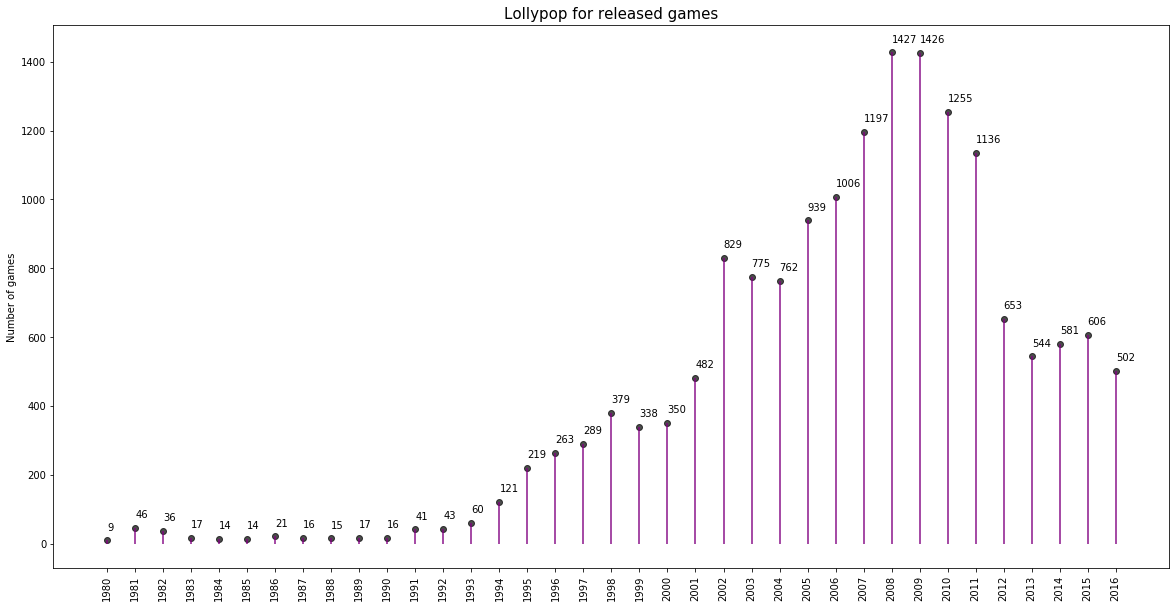

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
ax.vlines(x=df.year_of_release, ymin=0, ymax=df.name, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=df.year_of_release, y=df.name, alpha=0.7, color='black')
ax.set_title('Lollypop for released games', fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(df.year_of_release)
ax.set_xticklabels(df.year_of_release, rotation=(90))
for row in df.itertuples():
    ax.text(row.year_of_release, row.name+30,s=round(row.name,2))

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: This graph is perfect! It is labeled, y axis is labeled and it is informative!
</div>

It's logical that before 1995 we have almost no observations, because the game industry is a new industry. But also, the game industry is been growing really fast in the last years, do everything started to change a lot by year. So the data that is older from 10 years in not so relevant. Taking this in consideration and taking in consideration that we also want to have enough data to be available to make a good analysis, we will decide the next: after looking at how many games were released in different years we understood that not every period is significant, and we will use the data from the year 2002 until 2016. 

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: I couldn't agree more! 
</div>

Before we slice the data let's check deeply the original data we have to understand if there is more factors that we should take in consideration.

## Looking at how sales varied from platform to platform. 


#### We will choose the platforms with the greatest total sales and build a distribution based on data for each year. 

In [34]:
##Grouping the data by platform and total_sales and calculating the sum for each game
sales_by_platform = data[['platform','total_sales']].groupby(['platform']).sum().sort_values(by="total_sales").reset_index()

Let's take a look at sales_by_platform

In [35]:
sales_by_platform

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


We can appreciate that the platform PS2 is the leader in terms of sales.

We will use the standard score to make some measures!
In statistics, the standard score is the number of standard deviations by which the value of a raw score (i.e., an observed value or data point) is above or below the mean value of what is being observed or measured.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: It is a great method!
</div>

In [36]:
#Calculating the standard score and adding a new column with these values 
sales_by_platform['sales_z'] = (sales_by_platform['total_sales']-sales_by_platform['total_sales'].mean())/sales_by_platform['total_sales'].std()
#Let's take a look at the table after adding the standard score column
sales_by_platform

,platform,total_sales,sales_z
0,PCFX,0.03,-0.826577
1,GG,0.04,-0.826548
2,3DO,0.10,-0.826373
3,TG16,0.16,-0.826199
4,WS,1.42,-0.822536
5,NG,1.44,-0.822477
6,SCD,1.86,-0.821256
7,DC,15.95,-0.780292
8,GEN,28.35,-0.744240
9,SAT,33.59,-0.729006


The positive values in the sales_z column means that these values (platforms) are about the mean of total_sales. And the negative values are below.

We can appreciate that the minimum negative value (-0.997489 for N64 platform) is not so far away from the mean,while the maximum positive value(1.788402 for PS2 platform) is more away from the mean (in terms of standard deviation). 

#### Let's make some visualizations!

We will make two labels, red for the positive values and green for the negatives values.

In [37]:
#Adding the colors column to the sales_by_platform table
sales_by_platform['colors'] = ['red' if x<0 else 'green' for x in sales_by_platform['sales_z']]
#Let's take a look at the table after adding the colors column
sales_by_platform.head()

,platform,total_sales,sales_z,colors
0,PCFX,0.03,-0.826577,red
1,GG,0.04,-0.826548,red
2,3DO,0.10,-0.826373,red
3,TG16,0.16,-0.826199,red
4,WS,1.42,-0.822536,red


#### Plotting a graph that shows the distribution 

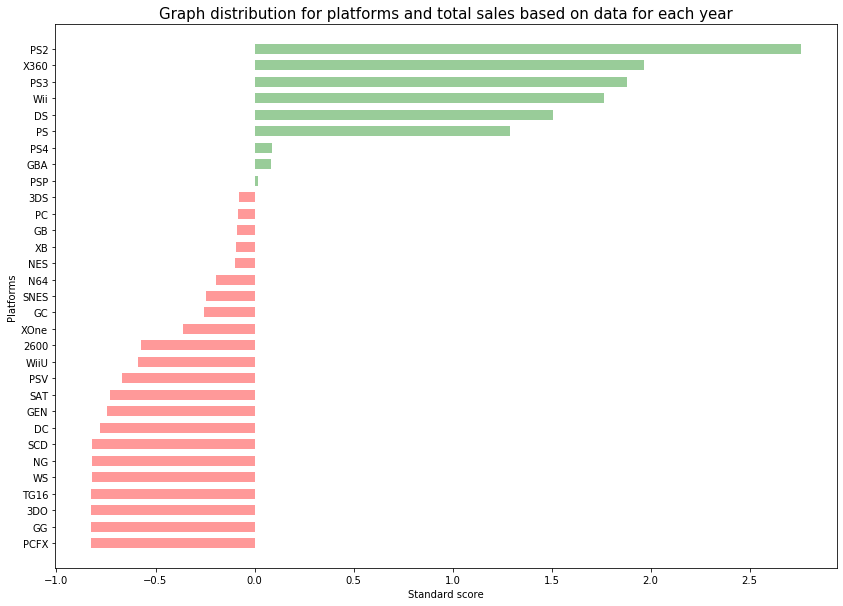

In [38]:
plt.figure(figsize=(14,10))
plt.hlines(y=sales_by_platform.platform, xmin=0, xmax=sales_by_platform.sales_z, color=sales_by_platform.colors, alpha=0.4, linewidth=10)
     
# Add labels
plt.title('Graph distribution for platforms and total sales based on data for each year',fontsize=15)
plt.ylabel('Platforms') 
plt.xlabel('Standard score') 
plt.show()

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: This graph is also flawless!
</div>

***What do we see in the graph?***<br>
* The platforms with the greatest total sales are PS2,DS,Wii,PS3,X360,PS,PSP,GBA,PS4. 
* While the last three platforms (PSP,GBA,PS4) that we mentioned are above the mean in terms of sales but not in a very significant way.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Absolutely correct!
</div>

## Looking for platforms that used to be popular but now have zero sales. 
How long does it generally take for new platforms to appear and old ones to fade?

In [39]:
#Grouping the data by year_of_release and platform and calculating the counts for each game
df1 = data.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index().sort_values(by=['total_sales']).reset_index()
#drop the column index
df1 = df1.drop(['index'],axis=1) 

#looking what we got
display(df1.head())

,year_of_release,platform,total_sales
0,2007,DC,0.02
1,1994,3DO,0.02
2,1985,DS,0.02
3,1988,PC,0.03
4,1996,PCFX,0.03


#### Plotting a graph that shows  the evolution across the years  (in terms of sales) for each platform

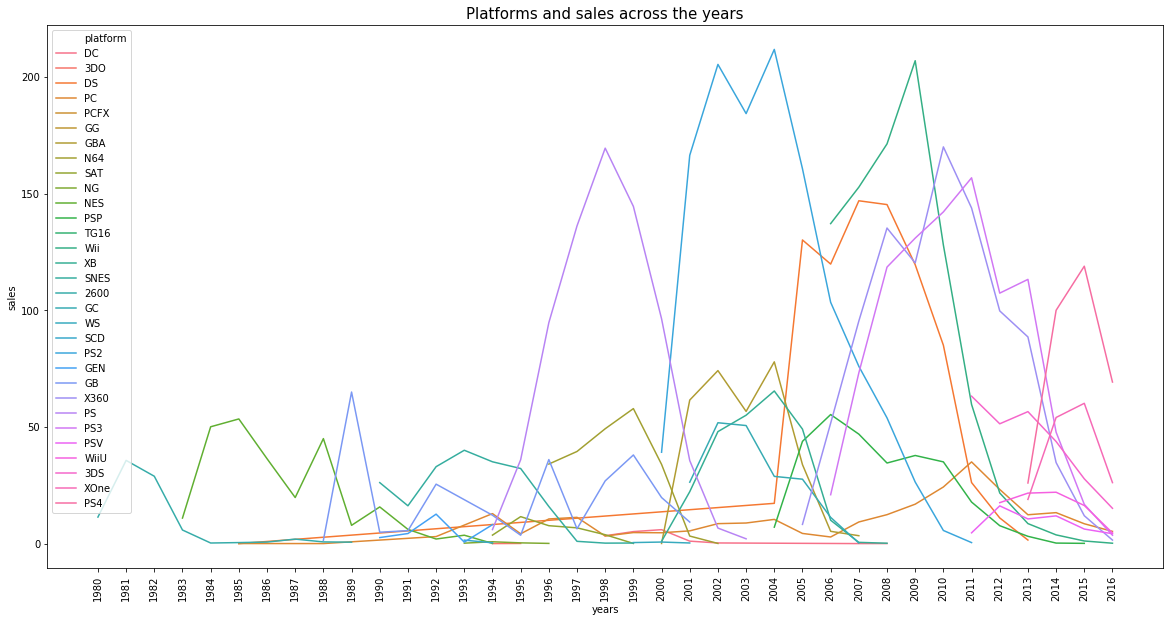

In [40]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=df1, x='year_of_release', y='total_sales', hue='platform')

# Add labels platforms that used to be popular but now have zero sales
ax.set_title('Platforms and sales across the years', fontdict={'size':15})
ax.set_ylabel('sales')
ax.set_xlabel('years')
ax.set_xticks(df.year_of_release)
ax.set_xticklabels(df.year_of_release, rotation=(90))

plt.show()

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: So beautiful! 😄
</div>

##### How long does it generally take for new platforms to appear and old ones to fade?

We can conclude that video games platforms survive in the market an approximation of 10 years.

##### platforms that used to be popular but now have zero sales
		
The most popular platforms in terms of sales are PS2,DS,Wii,PS3,X360,PS,PSP,GBA and PS4. We know this thanks to the graph "Distribution for platforms and total sales based on data for each year". 
Let's make a new graph that looks exactly like the last one we did, but including only the most popular platforms in terms of total sales.

In [41]:
#Making a list with the names of the popular platforms
list_popular_platforms_by_sales = ["PS2","DS","Wii","PS3","X360","PS","PSP","GBA","PS4"]
#Making a sclice using the query() method 
df2 = df1.query('platform in  @list_popular_platforms_by_sales').reset_index()
#drop the column index
df2 = df2.drop(['index'],axis=1) 

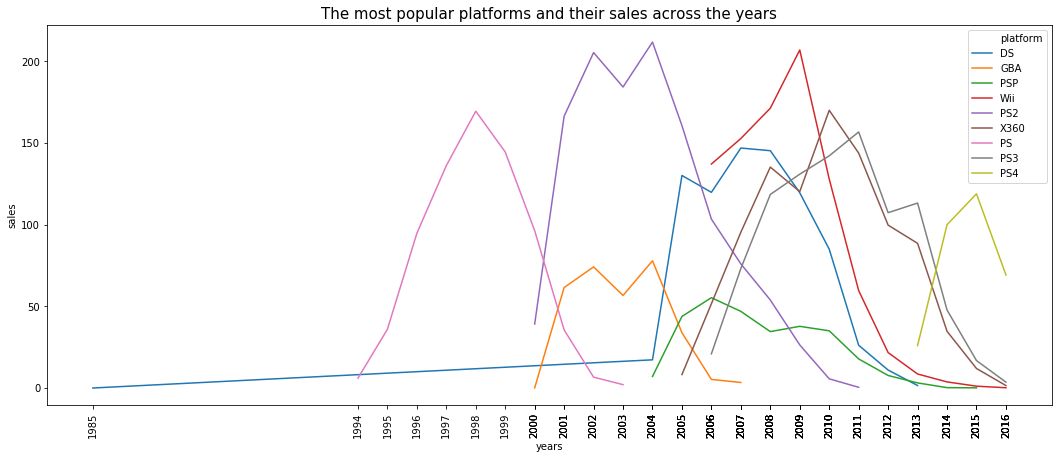

In [42]:
fig, ax = plt.subplots(figsize=(18,7))
sns.lineplot(data=df2, x='year_of_release', y='total_sales', hue='platform')

# Add labels platforms that used to be popular but now have zero sales
ax.set_title('The most popular platforms and their sales across the years', fontdict={'size':15})
ax.set_ylabel('sales')
ax.set_xlabel('years')
ax.set_xticks(df2.year_of_release)
ax.set_xticklabels(df2.year_of_release, rotation=(90))

plt.show()

*Let's use this table to understand our graph better*

In [43]:
#Grouping the data by platform and showing the last year with sales  
df2_last_year = df2.groupby(['platform']).agg({'year_of_release': 'max'}).reset_index()
df2_last_year 

,platform,year_of_release
0,DS,2013
1,GBA,2007
2,PS,2003
3,PS2,2011
4,PS3,2016
5,PS4,2016
6,PSP,2015
7,Wii,2016
8,X360,2016


***What do we see in these graphs and tables?***<br>
We can see that the platforms GBA and PS used to be popular few years ago, but now there are not in the market. We can say the same about the DS platforms, that dessapear from the market after the 2013, and the PS2 that desapear in the 2007. The PSP also was a popular platform and reported sales in the 2015, but not in the 2016.

**Why?**<br>
Maybe because gamers play more from the computer now?
<br>
<br>
*The Big Picture Thus Far:* 
* We can conclude that we have 4 populars platforms in terms of sales that made sales also in the last year (2016)and they are : Wii,X360,PS4 and PS3.

<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
Remark: I think this is due to the fact that new consoles appear too quickly.
</div>

## After all this calculations and graphs, it's time to determine what period we should take data for. 
Remember that the data should allow us to build a prognosis for 2017. 

We will use the data from the year 2002 until 2016. We will call to our selection data_filter.

In [44]:
data_filter = data.query('year_of_release > 2001')

Let's take a look at the statistic summary for data_filter

In [45]:
#show statistic summary for data_filter
data_filter.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,13638.000000,13638.000000,13638.000000,13638.000000,13638.000000,7418.000000,7007.000000,13638.000000
mean,2008.476389,0.239121,0.142099,0.053761,0.050870,68.737126,7.086799,0.485851
std,3.785747,0.717534,0.520272,0.246589,0.202845,13.807442,1.499224,1.478568
min,2002.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2006.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.350000,0.050000
50%,2008.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.400000,0.150000
75%,2011.000000,0.220000,0.100000,0.030000,0.030000,79.000000,8.200000,0.430000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,98.000000,9.700000,82.540000


**Note:** <br>
* The mean of total_sales is 0.485851 
* The max value in total_sales is 82.54 (far away from the mean)
* The third quartile is rounding the 0.43 (really closer to the mean)

There are a few games that are making really good sales.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Agree
</div>

## Which platforms are leading in sales? 
We will select several potentially profitable platforms.

We want a table like the table sales_by_platform, that is the table we got by grouping the data by platform and total_sales and calculating the sum. But now we only need the columns platform and total_sales and also, this time we will use the data_filter (the slice of the data that is good for our investigacion). 
In order to make a good visualization we will use a treemap graph, and for this we also need to calculate the sizes of the rectangles.

In [46]:
#Grouping the data_filter table by platform and total_sales and calculating the total sales for each platform
filter_sales_by_platform = data_filter[['platform','total_sales']].groupby(['platform']).sum().sort_values(by="total_sales").reset_index()
#Let's take a look
filter_sales_by_platform

,platform,total_sales
0,N64,0.08
1,DC,0.35
2,PS,8.74
3,PSV,53.81
4,WiiU,82.19
5,XOne,159.32
6,GC,170.39
7,PC,195.59
8,XB,228.32
9,GBA,251.28


In [47]:
#Defining the values for each rectangle
sizes = filter_sales_by_platform.total_sales.values.tolist()

In [48]:
#Defining the labes
labels = filter_sales_by_platform.apply(lambda x: str(x[0])+"\n"+"$"+str(round(x[1])),axis=1)

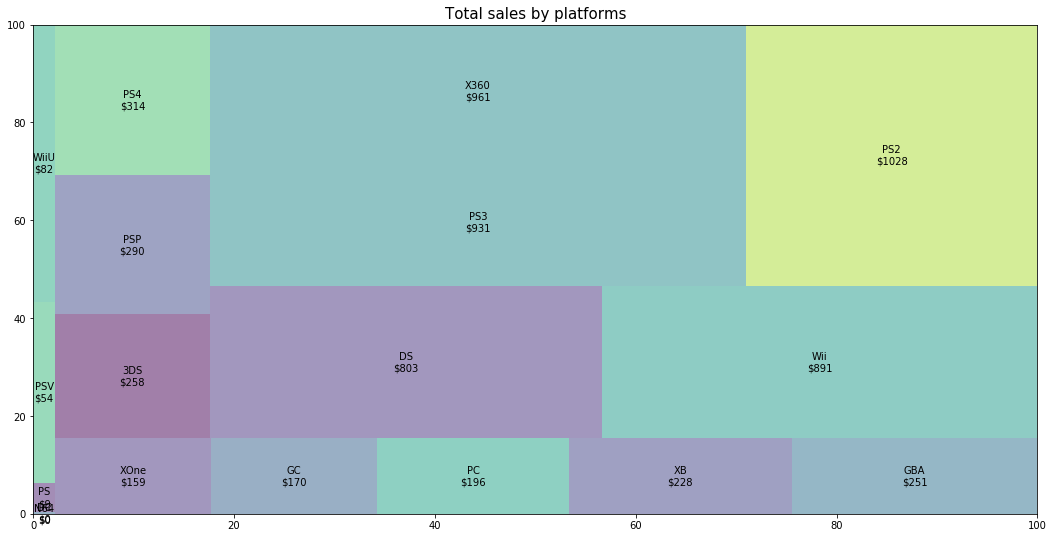

In [49]:
#Plotting the graph
plt.figure(figsize=(18,9))
squarify.plot(sizes=sizes, label=labels, alpha=0.5)

# Add labels
plt.title('Total sales by platforms',fontsize=15)
plt.show()

Before we make conclusions let's take a look at the statistic summary for filter_sales_by_platform table (data_filter grouped by platform and total_sales and calculating the total sales for each platform)

In [50]:
#show statistic summary for data_filter
filter_sales_by_platform.describe()

,total_sales
count,18.000000
mean,368.112778
std,368.959180
min,0.080000
25%,101.472500
50%,239.800000
75%,680.605000
max,1027.960000


**What do we see  in the graph?**<br>
The platforms that are leading in sales are DS, Wii, PS3, PS2 and X360. 

**Let's make some conclusions!**<br>
* We already know that the DS platform dessapeared from the market after the 2013, and the PS2 after the 2007. So we should not taken this platforms in consideration for future analysis about building a prognosis for 2017. 
* What about the PS4 platform? <br>
The platform reported sales in 2016, and also made 314 in sales, while the mean renueve it's about $368. The PS4 it's obviously not leading in sales, but reported sales in 2016 and entered to the market at 2013, so we can suppose that this platform will have future in terms of sales. In the graph "The most popular platforms and their sales across the years" we can appreciate a decrease on the total sales for this platform in the last year. <br>*Should we take this platform in consideration for future analysis about building a prognosis for 2017?* <br>
For now we will consider this platform like one of our chosen ones. Maybe after a few calculations and visualizations the situation will be more clear.

<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
Remark: I didn't really understand whether this question was addressed to me or not, but I'll answer just in case. In real tasks, it is necessary to consider market newcomers because they have the most chances to become a hit, but we may not know this yet. Of course, the PS4 has made fewer sales than DS, but DS have been on the market since 2003, and the PS4 since 2013.
</div>

*The Big Picture Thus Far:* 

* For now, the platforms we will take into consideration for future analysis about building a prognosis for 2017 are: Wii,X360,PS4 and PS3. 
* To make a good decision about the platforms we should choose we need to know their sales evolution across the years.


## Which platforms are growing or shrinking? 

Let's create a new table using pivot table and the data_filter table. <br>
We want to see the sales evolution across the years for every platform. We will choose the year_of_release column to be the index, will pass the column platform to the parameter columns, and for the parameter values will pass the total_sales column, calculating the sales of every plartform by year.

In [51]:
df3 = pd.pivot_table(data_filter, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)

Let's take a look at the new table

In [52]:
df3.T.head()

year_of_release,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14
DC,0.29,0.00,0.00,0.00,0.00,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,0.00,0.00,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00
GBA,74.16,56.67,77.91,33.86,5.28,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,51.81,50.61,28.82,27.62,11.26,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Pandas dataframe.shift() function Shift index by desired number of periods with an optional time freq. We wil use this function to see the platforms sales evolution across the years.

In [53]:
#Using dataframe.shift() function 
dinamics = df3 - df3.shift(+1)
#Let's take a look at the platforms sales evolution across the years.
dinamics.T.head()

year_of_release,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,
3DS,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.20,-11.84,5.21,-12.81,-15.98,-12.64
DC,NaN,-0.29,0.00,0.00,0.00,0.02,0.02,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,NaN,0.00,17.27,112.87,-10.33,27.13,-1.63,-25.77,-34.52,-58.84,-15.17,-9.47,-1.54,0.00,0.00
GBA,NaN,-17.49,21.24,-44.05,-28.58,-1.88,-3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,NaN,-1.20,-21.79,-1.20,-16.36,-10.99,-0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### The table it's nice but  a good visualization will make the numbers more understandable
A heatmap is a type of chart that uses different shades of colors to represent data values. <br>
Using the table we just made, we will make a heatmap graph were the darkest color red will represent a increase in sales and the darkest color blue the opposite.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: I couldn't agree more!
</div>

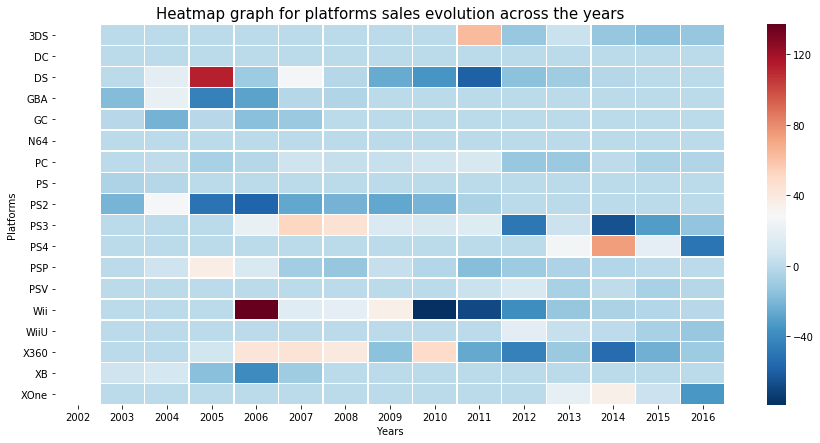

In [54]:
plt.figure(figsize=(15,7))
sns.heatmap(dinamics.T, cmap="RdBu_r", linewidths=.5)

# Add labels
plt.title('Heatmap graph for platforms sales evolution across the years',fontsize=15)
plt.ylabel('Platforms') 
plt.xlabel('Years') 
plt.show()

**Note:** <br>
The platforms we are taking into consideration (for now) for future analysis about building a prognosis for 2017 are: Wii,X360,PS4 and PS3.
<br>
<br>
<br>
***What do we see in the heatmap?***<br>
* The platforms with the greater increase sales are DS (in 2005) and Wii (in 2006).
* DS platform was really popular but dessapeared from the market after the 2013 (But we already knew this)
* Wii platform sales also increase in 2009, but in 2010 they decreased a lot, and the sales for this platform in general continue to decrease after 2010 until now.
* The PS4 sales increase in 2014, and them decreased in 2015. 
* The PS3 platform sales increase in 2007 and 2008 but they decreased in 2014 in a dramatic way, being 2015 and 2016 also years with a little decrease in the sales.
* For the X360 platform there is not a year where the sales increase in a dramatic way (like happens to DS and Wii),instead there are 4 years were the sales for this platforms increase a little. In 2014 the platform sales decreased significant and decreased a little in 2015. But in 2016 the sales stay stable.
* Surprise! By looking at the PSP in the heatmap we can apreciette  that also this platform could be relevant, with a increase in the sales in 2005. Also reported sales in 2015 (but not in 2016). Just don't forget that the PSP entered to the market at 2004. So maybe it's also the end of the PSP era.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: I haven't seen the PSP ever since 😄
</div>

## Building a box plot for the global sales of all games, broken down by platform

In [55]:
#Grouping the data by platform and year_of_release and calculating the sum of total_sales
grouped=data_filter.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
#Grouping the grouped table and using sort_values() to order our boxplots in ascending order
ordered=grouped.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']

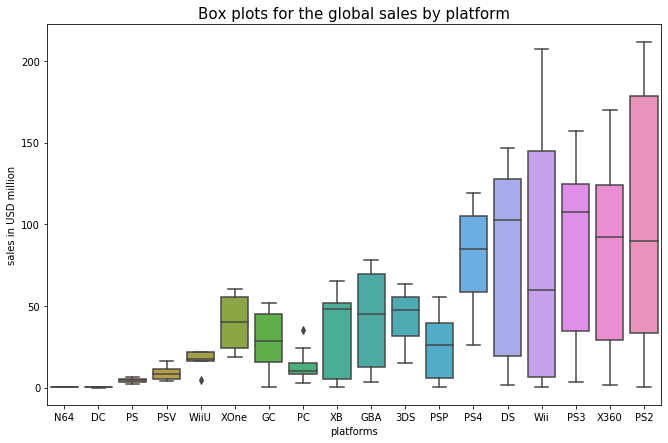

In [56]:
#Plotting the box plots
plt.figure(figsize=(11,7))
sns.boxplot(x='platform',y='total_sales',data=grouped,order=ordered)

# Add labels
plt.title('Box plots for the global sales by platform',fontsize=15)
plt.ylabel('sales in USD million') 
plt.xlabel('platforms') 
plt.show()

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: The graph is perfect!
</div>

#### Removing outliers and plotingthe box plots again

Lower bound: -91.24999999999999
Upper bound: 174.86999999999998


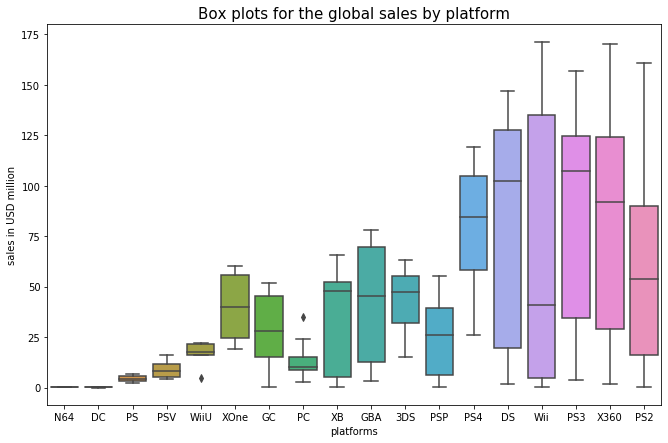

In [57]:
def calc_lower_upper_bounds(df, col_name):
    # calculate Q1 and Q3
    Q1 = df[col_name].quantile(.25)
    Q3 = df[col_name].quantile(.75)
    # calculate IQR
    IQR = Q3-Q1
    # calculate upper and lower bounds for outlier detection
    outlier_lower_bound = Q1 - 1.5*IQR
    outlier_upper_bound = Q3 + 1.5*IQR
    print('Lower bound:', outlier_lower_bound) 
    print('Upper bound:', outlier_upper_bound)
    return {'lower_bound':outlier_lower_bound, 'upper_bound':outlier_upper_bound}
lower_bound, upper_bound = calc_lower_upper_bounds(grouped, 'total_sales').values()
filtered_game_sales = grouped.query('total_sales < @upper_bound & total_sales > @lower_bound')

fig, ax = plt.subplots(figsize=(11,7))
#filtered_game_sales.boxplot(by='platform', column='total_sales', ax=ax);
sns.boxplot(x="platform", y="total_sales", data=filtered_game_sales ,order=ordered)

# Add labels
plt.title('Box plots for the global sales by platform',fontsize=15)
plt.ylabel('sales in USD million') 
plt.xlabel('platforms') 
plt.show()

We are definitely using the first box plots graphs (with all the data_filter data) for our analysis. We can see that removing the outliers looks unnecessary and also make big distortions in our results. Also, if there is outliers is because there is a sifnificant decrease or increase in the sales, and thats okay! We are speaking here about sales by platforms across the years, all the sales are relevant!

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: It is right decision!
</div>

***What do we see in the boxplots?***<br>
* The PS2 platform is leading in sales but we already know that this platform dessapeared from the market after 2007. So the PS2 sales are not so relevant for us now.
* The X360 made good sales, and we already know it's a more stable platform in terms of sales, that also reported sales in 2016.
* The Wii platforms has good sales, but we already know that the sales are decreasing in the last 9 year, with years were the sales decrease was dramatic. We can see in the Wii box plot that the mean is closer to the first quartile and far away from the third. We have a lot of low values! All the sales of the last 9 years. Taking in consideration that the platforms survive in the market an approximation of 10 years, it's obvious that we are seeing the end of the Wii era. The Wii platform is not relevant for our analysis.
* The PSP suprise us again! The sales were nice. But it's probabely that the planform will desapear soon 


**Note:** <br>
The platforms we are taking now into consideration for future analysis about building a prognosis for 2017 are: X360,PS4 and PS3.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Agree
</div>

## Taking a look at how user and professional reviews affect sales for one popular platform.
Building a scatter plot and calculating the correlation between reviews and sales for a chosen platform.

We are choosing the X360 platform! Nice sales across the years,reported sales in 2016 and also reported sales in the last 10 years, while the sales increased in 2006, 2007,2008 and 2010. Although the sales decreased in the last years the decrease was not so dramatic.

Making a function that plot a scatter graph and shows the correlation calculations,  in order to check the effects of review score on total sales for a specific platform.

In [58]:
def score_effect(plat):
    #subset of data by parameter platform
    df4=data_filter[data_filter['platform']==plat]
    # correlation calculation - using Spearman because distribution is not normal
    df_corr =  df4[['user_score', 'critic_score', 'total_sales']].corr(method="spearman")
    # print result and conclusion
    df_corr_style = df_corr.style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))
    print("Correlation calculations for",plat," platform")
    display(df_corr_style)
    #build scatter plot for critic and user score
    df4.sort_values('total_sales').plot(x='total_sales', y='critic_score',kind='scatter', marker='o',color="pink", alpha=0.4) 
    plt.title("Critic Score vs Total Revenue", fontdict={'size':15})
    df4.sort_values('total_sales').plot(x='total_sales', y='user_score',kind='scatter', marker='o',color="purple", alpha=0.4) 
    plt.title("User Score vs Total Revenue", fontdict={'size':15})
    plt.show()  
    # if correlation value is above 0.5, there is correlation.
    if abs((df_corr.iloc[0]['total_sales']) >= 0.5): 
        print("There is a strong correlation between user_score and total_sales in platform", plat)
        if df_corr.iloc[0]['total_sales'] > 0:
            print("It's a positive correlation")
        else: 
            print("It's a negative correlation")      
    elif abs((df_corr.iloc[1]['total_sales']) >= 0.5): 
        print("There is a strong correlation between critic_score and total_sales in platform", plat)
        if df_corr.iloc[2]['total_sales'] > 0:
            print("It's a positive correlation")
        else:
            print("It's a negative correlation")  
    else:
        print("There is no correlation in platform", plat)

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: This function is a masterpiece!
</div>

Correlation calculations for X360  platform


,user_score,critic_score,total_sales
user_score,1.000000,0.596228,0.291071
critic_score,0.596228,1.000000,0.660874
total_sales,0.291071,0.660874,1.000000


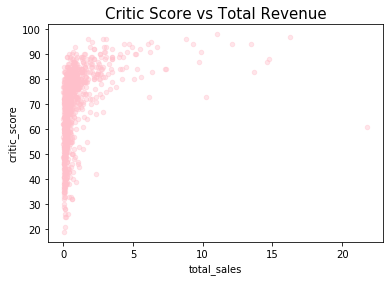

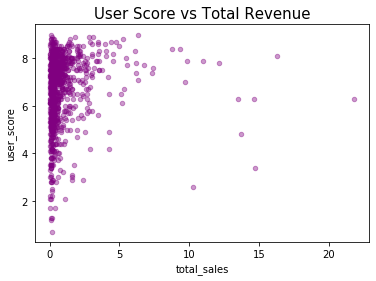

There is a strong correlation between critic_score and total_sales in platform X360
It's a positive correlation


In [59]:
score_effect("X360")

## Keeping our conclusions in mind, let's compare other platforms.

Keeping your conclusions in mind, compare the sales of the same games on other platforms.
 Let's take the most relevants platforms we have, the ones that can helps us to build a prognosis for 2017:  X360,PS4 and PS3. <br>
 We already did the calculations for the X360 platform.

Correlation calculations for PS3  platform


,user_score,critic_score,total_sales
user_score,1.000000,0.591288,0.315990
critic_score,0.591288,1.000000,0.652035
total_sales,0.315990,0.652035,1.000000


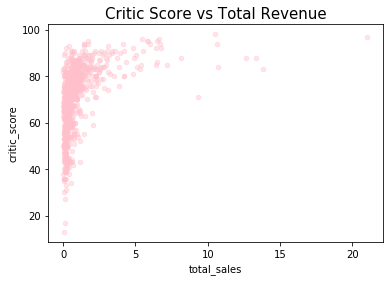

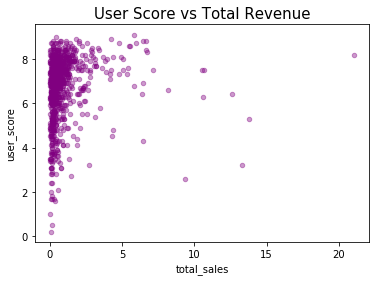

There is a strong correlation between critic_score and total_sales in platform PS3
It's a positive correlation


In [60]:
score_effect("PS3")

Correlation calculations for PS4  platform


,user_score,critic_score,total_sales
user_score,1.000000,0.433309,-0.028340
critic_score,0.433309,1.000000,0.508238
total_sales,-0.028340,0.508238,1.000000


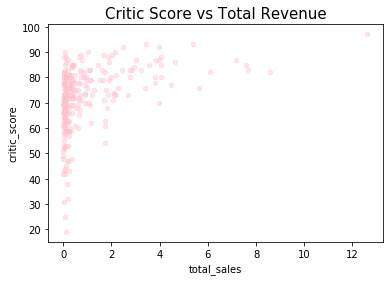

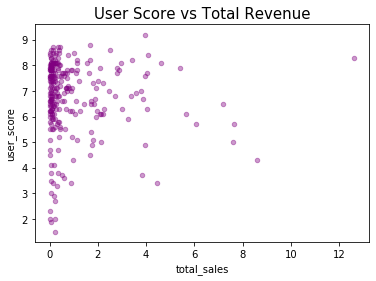

There is a strong correlation between critic_score and total_sales in platform PS4
It's a positive correlation


In [61]:
score_effect("PS4")

***What do we see in these graphs and calculations?***<br>
We can appreciate that also for the platforms PS4 and PS3 there is strong positive correlation between critic_score and total_sales. But not correlation exist between user_score and total_sales for any of the platforms.<br>

**Why?**<br>
This can be explained by the fact that the critic_score is made by a game critic, a person who reviews video games professionally (and generaly publish the reviews before the platform enter to the market). It's logical that potencial clients take a look at the critic score of the platforms before buying one.<br>
The user_score are users reviews about the games, less reliable than a game critic review.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: It seems right!
</div>

## Taking a look at the general distribution of games by genre. 

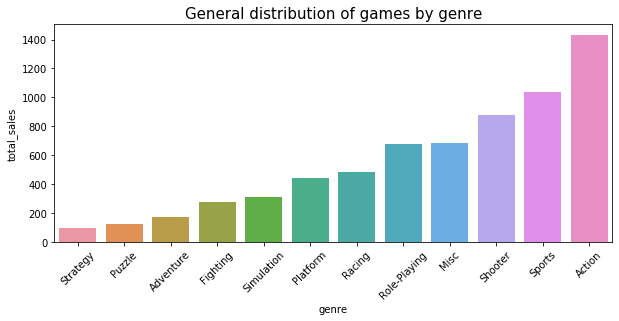

In [62]:
#Creating a pivot table by genre and total_sales values
genre_pivot = pd.pivot_table(data_filter, values='total_sales', index='genre', aggfunc='sum').sort_values(by='total_sales').reset_index()

#Plotting a graph
fig, ax = plt.subplots(figsize=(10,4))
x = sns.barplot(x = genre_pivot.genre, y = genre_pivot.total_sales)
x.set_title('General distribution of games by genre', fontdict={'size':15})
ax.set_xticklabels(genre_pivot.genre, rotation=(45))
plt.show()

* The most profitable genres are: action, sports, shooter.

* The least profitable genres are: strategy, puzzle, adventure.

## Overall conclusion after analyzing the data:

* The data isn't significant for every period. Fo that reason we are using the data from the year 2002 until 2016.
* The sales varied from platform to platform. Average lifetime of a platform is 10 years.
* Some platforms were very profitable and some are not.
* There are significant differences in sales across platforms.
* Professional reviews affect sales across platforms.
* Some genres are very profitable and some less.
* The platforms we are taking into consideration for future analysis about building a prognosis for 2017 are: ,X360,PS4 and PS3. We also can take into consideration the Wii platform and the PSP platform if needed.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Great conclusion!
</div>

# Creating a user profile for each region
**For each region (NA, EU, JP) we will determine:**
1. The top five platforms.
2. The top five genres. 
3. Answering the question : Do ESRB ratings affect sales in individual regions?

## Top five platforms and in their market shares from region to region

We decided that the platforms we are taking into consideration for future analysis about building a prognosis for 2017 are: X360,PS4 and PS3. For our five top platforms we will use also the Wii and the PSP , and not the PS2 because we already know that this platform disappeared from the market a few years a go (also the DS platform) 

In [63]:
#Making a list with the names of the top five platforms - in sales terms
list_top_platforms_by_sales = ["Wii","PS3","X360","PSP","PS4"]
#Making a sclice using the query() method 
data_top_platforms_by_sales = data_filter.query('platform in  @list_top_platforms_by_sales').reset_index()
#drop the column index
data_top_platforms_by_sales = data_top_platforms_by_sales.drop(['index'],axis=1) 

In [64]:
#creat a pivot table grouped by platform calculating the sum of the values for 'na_sales', 'eu_sales', 'jp_sales'
platforms_regions = data_top_platforms_by_sales.pivot_table(index = ['platform'],  values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
#using resent_index()
platforms_regions.reset_index(inplace=True)
#Let's take a look                                       
platforms_regions 

,platform,eu_sales,jp_sales,na_sales
0,PS3,327.21,79.41,390.13
1,PS4,141.09,15.96,108.74
2,PSP,65.62,75.88,107.27
3,Wii,258.32,68.28,486.87
4,X360,268.32,12.30,595.74


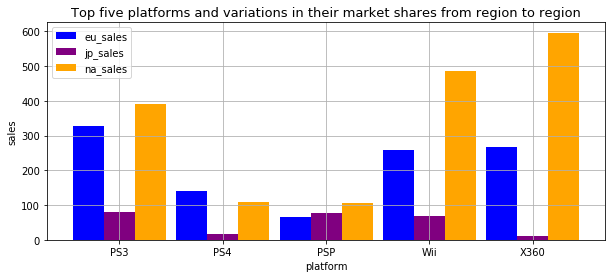

In [65]:
#Plotting a bar graph
platforms_regions.plot(kind='bar', x='platform', figsize=(10,4), grid = bool, rot=0, color=['blue','purple','orange'], width=0.9)
plt.title("Top five platforms and variations in their market shares from region to region", fontdict={'size':13})
plt.ylabel("sales")
plt.show() 

***What do we see in the graph?***<br>
* We can see that North America has the largest market share across platforms,followed by Europe and Japan, respectively. 

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Absolutely correct!
</div>

## Top five genres in terms of sales -  by market shares regions

In [66]:
#Making a list with the names of the top fives genres
top_five_genres_names = genre_pivot.nlargest(5, ['total_sales']).genre.tolist()
#Making a sclice using the query() method 
top_five_genres_data = data_filter.query('genre in  @top_five_genres_names').reset_index()
#drop the column index
top_five_genres_data = top_five_genres_data.drop(['index'],axis=1) 

In [67]:
#creat a pivot table grouped by genre calculating the sum of the values for 'na_sales', 'eu_sales', 'jp_sales'
genres_regions = top_five_genres_data.pivot_table(index = ['genre'],  values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
#using resent_index()
genres_regions.reset_index(inplace=True)
#Let's take a look                                       
genres_regions 

,genre,eu_sales,jp_sales,na_sales
0,Action,436.49,122.50,704.67
1,Misc,187.55,81.40,348.17
2,Role-Playing,147.34,216.36,267.64
3,Shooter,284.35,22.55,476.12
4,Sports,315.67,65.62,537.84


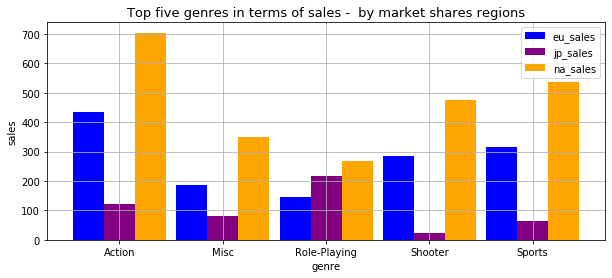

In [68]:
#Plotting a bar graph
genres_regions.plot(kind='bar', x='genre', figsize=(10,4), grid = bool, rot=0, color=['blue','purple','orange'], width=0.9)
plt.title("Top five genres in terms of sales -  by market shares regions", fontdict={'size':13})
plt.ylabel("sales")
plt.show() 

***What do we see in the graph?***<br>
* The action genre is really popular in United States.
* Role-Playing genre is significative popular in Japan, and shooter genre less.
* The United States customers and the EU customers behaviours in games genres  terms are really similar.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Correct!
</div>

## Do ESRB ratings affect sales in individual regions?

In [69]:
#creat a pivot table grouped by rating calculating the sum of the values for 'na_sales', 'eu_sales', 'jp_sales'
genres_rating = data_filter.pivot_table(index = ['rating'],  values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
#using resent_index()
genres_rating.reset_index(inplace=True)
#Let's take a look                                       
genres_rating 

,rating,eu_sales,jp_sales,na_sales
0,-1,309.06,349.88,424.46
1,AO,0.61,0.00,1.26
2,E,630.17,175.38,1139.37
3,E10+,183.33,40.20,345.50
4,EC,0.11,0.00,1.53
5,M,456.15,53.44,698.99
6,RP,0.03,0.00,0.00
7,T,358.49,114.29,650.02


We need to drop the row for rating = -1.  It's the value we use to deal with missing values in the rating column.

In [70]:
#Using drop() method and the index of the rows
genres_rating  = genres_rating .drop([0])  

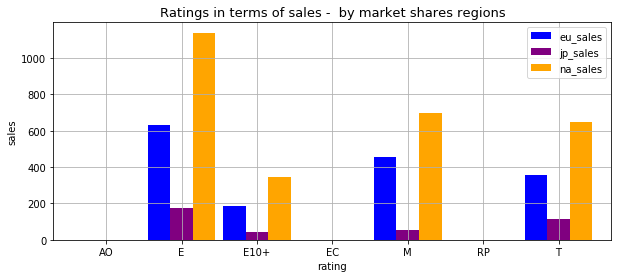

In [71]:
#Plotting a bar graph
genres_rating.plot(kind='bar', x='rating', figsize=(10,4), grid = bool, rot=0, color=['blue','purple','orange'], width=0.9)
plt.title("Ratings in terms of sales -  by market shares regions", fontdict={'size':13})
plt.ylabel("sales")
plt.show() 

***What do we see in the graph?***<br>
* Japan has 0 market share in EC (Early Childhood),RP (Rating Pending) and AO ratings.
* North America has the largest market share in E (Childhood) and 0 market share in RP (Rating Pending) ratings.
* Europe has the largest market share in E (Childhood) and a low market share in RP (0.03).

## Overall conclusion after creating a user profile for each region:
###### which platforms games should the company sell in 2017?
Selling the X360 platforms games to the USA and EU customers will be a good inversion. For the japaneses customers we can recommend PS3 and PSP.

###### which genres games should the company sell in 2017?
Action games! Everybody likes action games. Selling Role-Playing games to Japan it's our second recommendation.

###### which rating games should the company sell in 2017?
E rating it's our winner! And the company should consider selling games with this rating across all the regions.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Perfect!
</div>

# For the end! Let's test the following hypotheses:

## First Hypothesis
* H0: Average user ratings of the Xbox One and PC platforms are the same.
* H1:Average user ratings of the Xbox One and PC platforms are not the same

In [72]:
alpha = 0.05 
sample_1 = data_filter.query('(platform == "XOne") and (user_score > -1)').user_score
sample_2 = data_filter.query('(platform == "PC") and (user_score > -1)').user_score

results = st.ttest_ind(sample_1, sample_2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.00010751995267217297
We reject the null hypothesis


As we can see above, we reject the null hypothesis and thus we accept the alternative one: Average user ratings of the Xbox One and PC platforms are not the same.

## Second Hypothesis
* H0: Average user ratings for the Action and Sports genres are the same.
* H1: Average user ratings for the Action and Sports genres are different.

In [73]:
sample_1 = data_filter.query('(genre == "Action") and (user_score > -1)').user_score
sample_2 = data_filter.query('(genre == "Sports") and (user_score > -1)').user_score

results = st.ttest_ind(sample_1, sample_2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.021856947776548855
We reject the null hypothesis


As we can see above, we can't reject the null hypothesis: Average user ratings for the Action and Sports genres are the same.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: This part is flawless!
</div>

# General conclusion

**Let's start from the Beginning**!
When the costumers want a new game they buy games for the platform they already have. No gamer will buy a game when he can't play with him for not having the proper platform. Taking this in consideration we recomend to the company to take decisions looking at the popular platforms that we have in the markets, the ones that still report sells (because we already now that there is a general decrease in all sales across all the platforms).

**The platforms the company should take into consideration for 2017 prognosis are:** X360,PS4 and PS3.

**We also can take into consideration the Wii platform and the PSP platform if needed**
* We just want to make the company know that the Wii platform sales decrease through the last years. Wii is a old platfomr, so maybe is just the end of the Wii era. Not so sure that investing in this company is a good idea.
* The PSP platform sales are not amazing, but are good, and if the company decides to work with this platform we healy recommend to sell its games in the japanese market (were they are really popular).

**After taking the consideration the platforms behaviors in the market**  
And choosing the ones the company want to work with, we recommend choose games for each platform using the results and conclusions we got by creating a user profile for each region (It's possible to see the conclusions below the heading : Overall conclusion after creating a user profile for each region). 

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Great conclusion!
</div>